In [2]:
import pandas as pd

In [3]:
daily_transf = pd.read_csv("Daily_Transf_results_20.csv").set_index("datetime")
weekly_transf = pd.read_csv("Transf_results_20.csv").set_index("datetime")

# daily_ml_results = pd.read_csv("Daily_MLP_results_20.csv")
weekly_ml_results = pd.read_csv("MLP_results_20.csv").set_index("datetime")

In [9]:
import numpy as np
from sklearn.metrics import root_mean_squared_error, mean_absolute_error


def get_rmse(result: pd.DataFrame, model_name: str, baseline_name: str) -> pd.DataFrame:
    rmse = []
    for date, row in result.iterrows():
        true_vols = np.fromstring(row.true_vols.strip("[]").replace("\n", " "), sep=" ")
        model_preds = np.fromstring(
            row.model_preds.strip("[]").replace("\n", " "), sep=" "
        )
        baseline_preds = np.fromstring(
            row.baseline_preds.strip("[]").replace("\n", " "), sep=" "
        )

        print(model_preds)
        print(baseline_preds)
        rmse.append(
            [
                date,
                root_mean_squared_error(true_vols, model_preds),
                root_mean_squared_error(true_vols, baseline_preds),
                mean_absolute_error(true_vols, model_preds),
                mean_absolute_error(true_vols, baseline_preds),
            ]
        )

    return pd.DataFrame(
        rmse, columns=["date", model_name, baseline_name, "MAE1", "MAE2"]
    ).set_index("date")

In [10]:
daily_transf_rmse = get_rmse(daily_transf, "Transformer", "LSTM")
daily_transf_rmse

[5.1652507e-05 1.4829307e-02 2.5164487e-04 7.6941593e-04 2.8025985e-02
 6.5607829e-03 3.6334639e-04 6.0684903e-04 1.6118318e-03 4.3969536e-08
 3.6468571e-03 7.9893552e-02 7.6677725e-03 1.5823809e-02 1.0046267e-02
 7.3464219e-03 1.2562660e-03 1.7152796e-02 1.3161340e-03 1.1847774e-03]
[0.00023758 0.00023758 0.00023758 0.00023758 0.00023758 0.00023758
 0.00023758 0.00023758 0.00023758 0.00023758 0.00023758 0.00023758
 0.00023758 0.00023758 0.00023758 0.00023758 0.00023766 0.00023766
 0.00023766 0.00023766]
[0.00209029]
[0.00024235]
[3.4966192e-03 1.0698925e-03 9.6149230e-03 1.5801327e-02 4.0201535e-03
 3.4826435e-03 5.3752557e-04 1.3512047e-03 2.8426953e-02 3.8383540e-04
 5.2616680e-03 3.8895354e-02 6.1762244e-02 3.8133660e-06 2.8313641e-03
 3.0133171e-02 7.0962519e-03 1.3696909e-01 2.6878647e-03 3.2611411e-02
 7.5268424e-03 4.5154549e-04 8.1734210e-02]
[0.00024579 0.00024579 0.00024579 0.00024579 0.00024579 0.00024579
 0.00024579 0.00024579 0.00024579 0.00024579 0.00024579 0.00024579
 0

,Transformer,LSTM,MAE1,MAE2
date,,,,
2018-06-30,0.020134,0.000096,0.009734,0.000079
2018-07-03,0.001850,0.000002,0.001850,0.000002
2018-07-04,0.038358,0.000126,0.020502,0.000094
2018-07-05,0.023455,0.000089,0.014920,0.000078
2018-07-06,0.046539,0.000125,0.014861,0.000113
...,...,...,...,...
2018-09-26,0.047193,0.000118,0.028666,0.000115
2018-09-27,0.011425,0.000120,0.007285,0.000119
2018-09-28,0.022616,0.000120,0.013620,0.000113


In [11]:
daily_transf_rmse.mean(axis=0)

Transformer    0.026484
LSTM           0.000170
MAE1           0.015509
MAE2           0.000130
dtype: float64

In [12]:
def represent_as_html(df: pd.DataFrame) -> str:
    return df.style.format({var: "{:,.8%}".format for var in df.columns})

In [13]:
represent_as_html(daily_transf_rmse.mean(axis=0).to_frame())

,0
Transformer,2.64838352%
LSTM,0.01701130%
MAE1,1.55085377%
MAE2,0.01296713%


In [14]:
represent_as_html(daily_transf_rmse.std(axis=0).to_frame())

,0
Transformer,1.07373346%
LSTM,0.01579586%
MAE1,0.54727148%
MAE2,0.00578290%


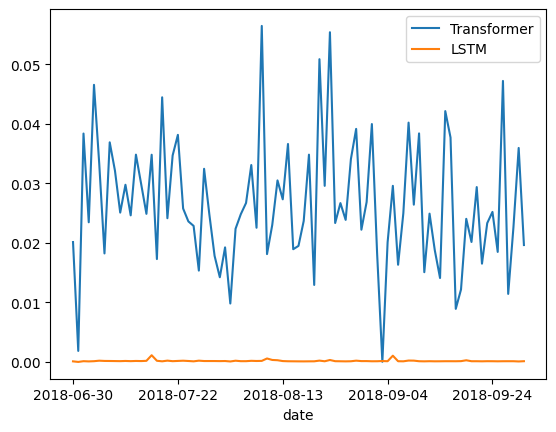

In [6]:
daily_transf_rmse.plot();

In [7]:
weekly_transf_rmse = get_rmse(weekly_transf, "Transformer", "LSTM")
weekly_transf_rmse

[0.00018845 0.00018881 0.00018881 0.00018881 0.00018881 0.00018881
 0.00018881 0.00018881 0.00018881 0.00018893 0.00018881 0.00018881
 0.00018881 0.00018881 0.00018881 0.00018893 0.00018881 0.00018881
 0.00018869 0.00018881 0.00018881 0.00018869 0.00018893 0.00018881
 0.00018881 0.00018881 0.00018881 0.00018881 0.00018881 0.00018881
 0.00018869 0.00018881 0.00018881 0.00018881 0.00018869 0.00018845
 0.00018881 0.00018881 0.00018881 0.00018881 0.00018881 0.00018881
 0.00018881 0.00018881 0.00018905 0.00018881]
[5.4953973e-05 5.7814836e-05 5.7934038e-05 5.7338024e-05 5.7338024e-05
 5.7576428e-05 5.7218822e-05 5.7695630e-05 5.7218822e-05 5.7934038e-05
 5.7218822e-05 5.7576428e-05 5.7695630e-05 5.7814836e-05 5.7338024e-05
 5.7934038e-05 5.7457226e-05 5.7457226e-05 5.6980418e-05 5.7934038e-05
 5.7457226e-05 5.7099620e-05 5.8291644e-05 5.7457226e-05 5.7457226e-05
 5.7338024e-05 5.7576428e-05 5.7338024e-05 5.7814836e-05 5.7338024e-05
 5.6861216e-05 5.7457226e-05 5.7695630e-05 5.7338024e-05 5.

,Transformer,LSTM
date,,
2018-06-30,0.000118,0.000208
2018-07-05,0.000105,0.000123
2018-07-10,0.000108,0.000125
2018-07-15,0.000559,0.000577
2018-07-20,0.000179,0.000202
2018-07-25,0.000107,0.000118
2018-07-30,0.000123,0.000139
2018-08-04,0.000154,0.000166
2018-08-09,0.000353,0.000363


In [8]:
weekly_transf_rmse.mean(axis=0)

Transformer    0.000187
LSTM           0.000199
dtype: float64

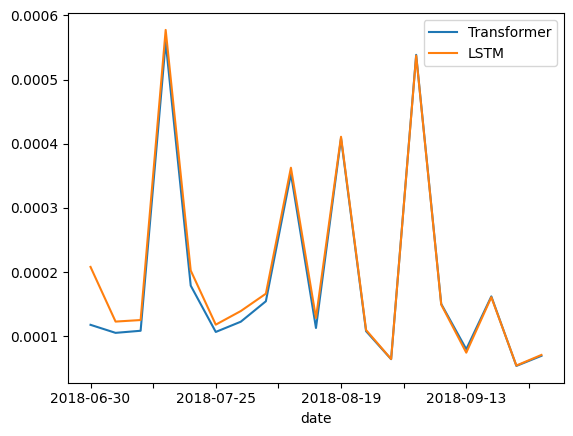

In [9]:
weekly_transf_rmse.plot();